In [10]:
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns


In [11]:
data = pd.read_pickle('data_preprocessing.pkl')

In [12]:
data

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status,Month,Day,Hour,Minute
0,18,Website,Sales-Agent-11,Other Locations,Mode-5,Low Potential,11,14,10,5
1,18,Website,Sales-Agent-10,Other Locations,Mode-5,Low Potential,11,14,9,22
2,18,Website,Sales-Agent-10,Other Locations,Mode-5,Low Potential,11,14,9,21
3,18,Website,Sales-Agent-10,Other Locations,Mode-5,Low Potential,11,14,8,46
4,18,Website,Sales-Agent-10,Other Locations,Mode-5,Low Potential,11,14,7,34
...,...,...,...,...,...,...,...,...,...,...
7417,9,Call,Sales-Agent-6,Mumbai,Mode-4,Low Potential,4,28,9,45
7418,15,Call,Sales-Agent-12,Other Locations,Mode-5,Low Potential,4,28,9,43
7419,5,Live Chat,Sales-Agent-11,Bangalore,Mode-1,Low Potential,4,28,9,20
7420,21,Existing Customer,Sales-Agent-4,Other Locations,Mode-1,Low Potential,4,28,8,4


### Exploratory data analysis

In [13]:
# Univariate analysis

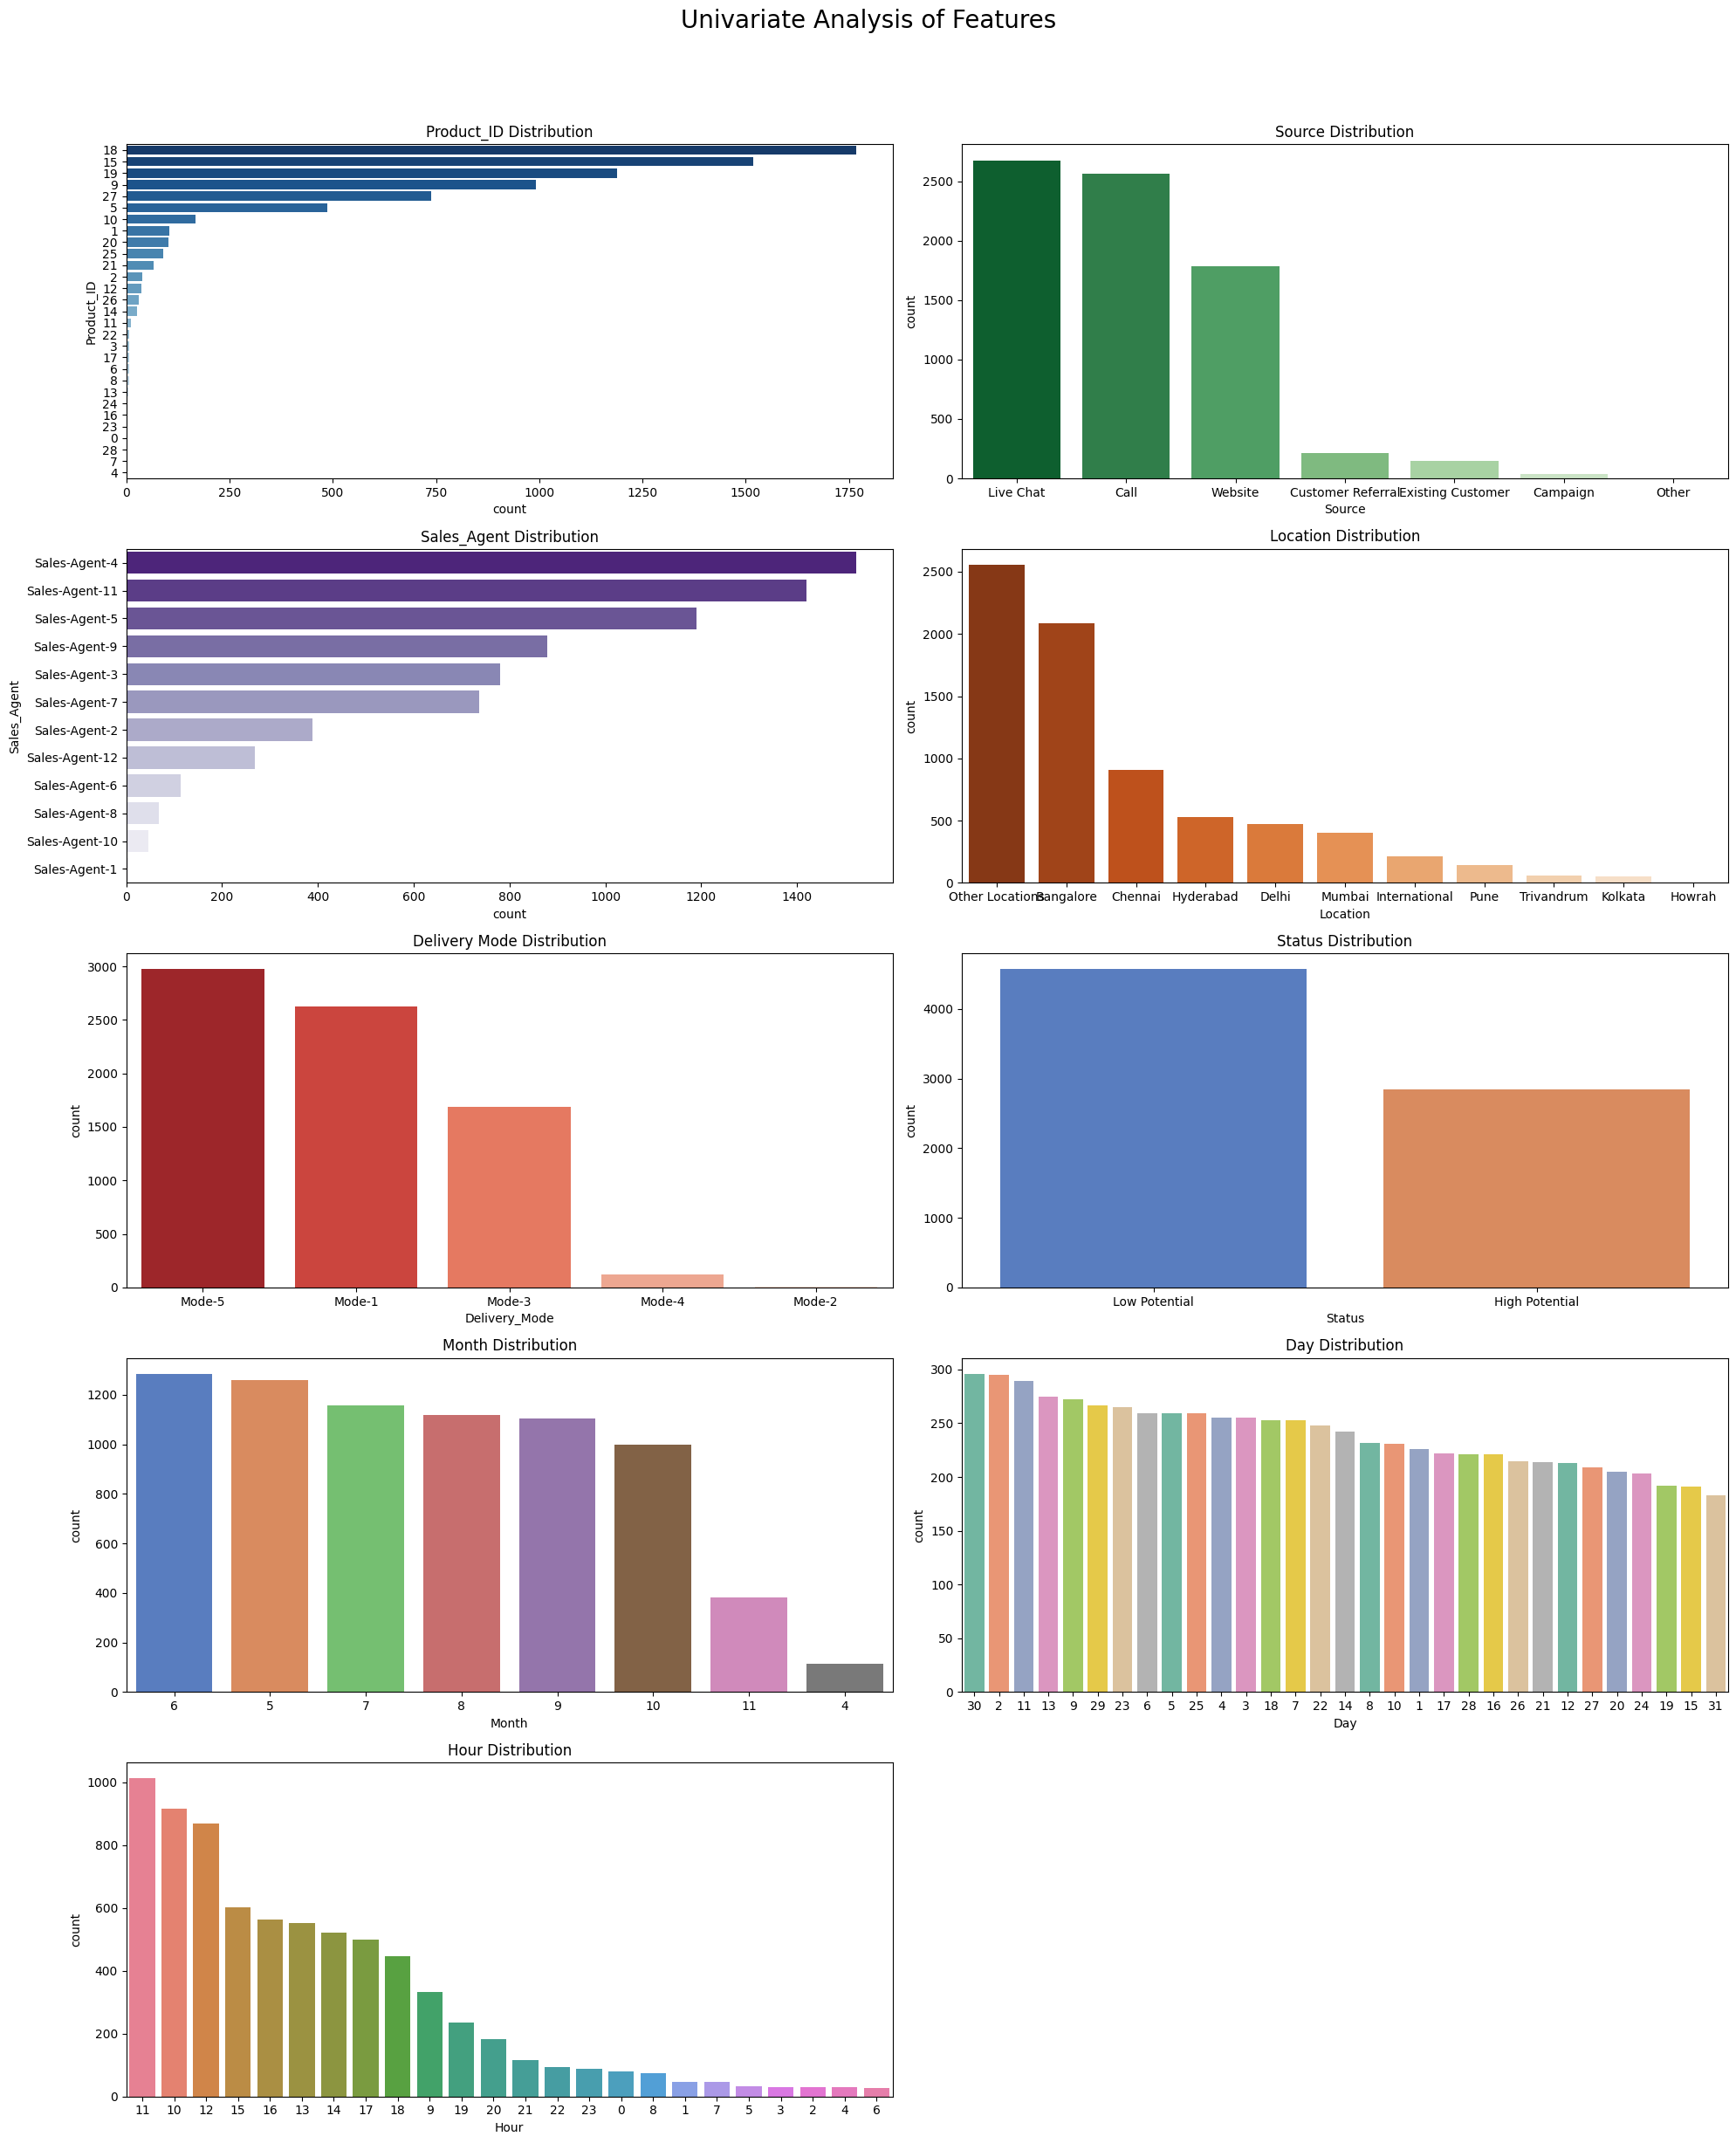

In [14]:
fig, axes = plt.subplots(5, 2, figsize=(20, 25))
fig.suptitle('Univariate Analysis of Features', fontsize=20)

sns.countplot(data=data, y='Product_ID', ax=axes[0, 0], palette='Blues_r', order=data['Product_ID'].value_counts().index)
axes[0, 0].set_title('Product_ID Distribution')

sns.countplot(data=data, x='Source', ax=axes[0, 1], palette='Greens_r', order=data['Source'].value_counts().index)
axes[0, 1].set_title('Source Distribution')

sns.countplot(data=data, y='Sales_Agent', ax=axes[1, 0], palette='Purples_r', order=data['Sales_Agent'].value_counts().index)
axes[1, 0].set_title('Sales_Agent Distribution')

sns.countplot(data=data, x='Location', ax=axes[1, 1], palette='Oranges_r', order=data['Location'].value_counts().index)
axes[1, 1].set_title('Location Distribution')

sns.countplot(data=data, x='Delivery_Mode', ax=axes[2, 0], palette='Reds_r', order=data['Delivery_Mode'].value_counts().index)
axes[2, 0].set_title('Delivery Mode Distribution')

sns.countplot(data=data, x='Status', ax=axes[2, 1], palette='muted', order=data['Status'].value_counts().index)
axes[2, 1].set_title('Status Distribution')

sns.countplot(data=data, x='Month', ax=axes[3, 0], palette='muted', order=data['Month'].value_counts().index)
axes[3, 0].set_title('Month Distribution')

sns.countplot(data=data, x='Day', ax=axes[3, 1], palette='Set2', order=data['Day'].value_counts().index)
axes[3, 1].set_title('Day Distribution')

sns.countplot(data=data, x='Hour', ax=axes[4, 0], palette='husl', order=data['Hour'].value_counts().index)
axes[4, 0].set_title('Hour Distribution')

fig.delaxes(axes[4, 1])
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [15]:
# bivariate analysis

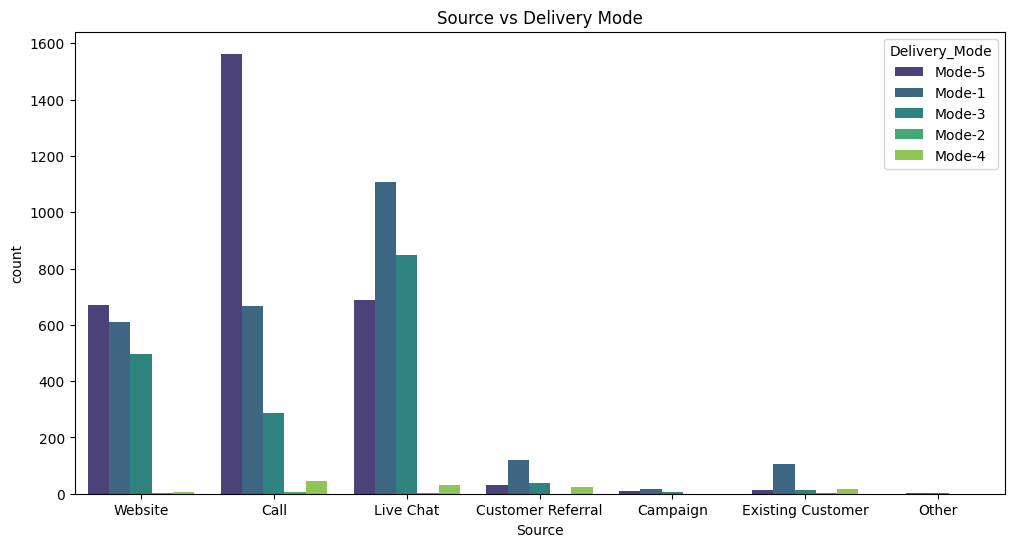

In [16]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='Source', hue='Delivery_Mode', palette='viridis')
plt.title('Source vs Delivery Mode')
plt.show()

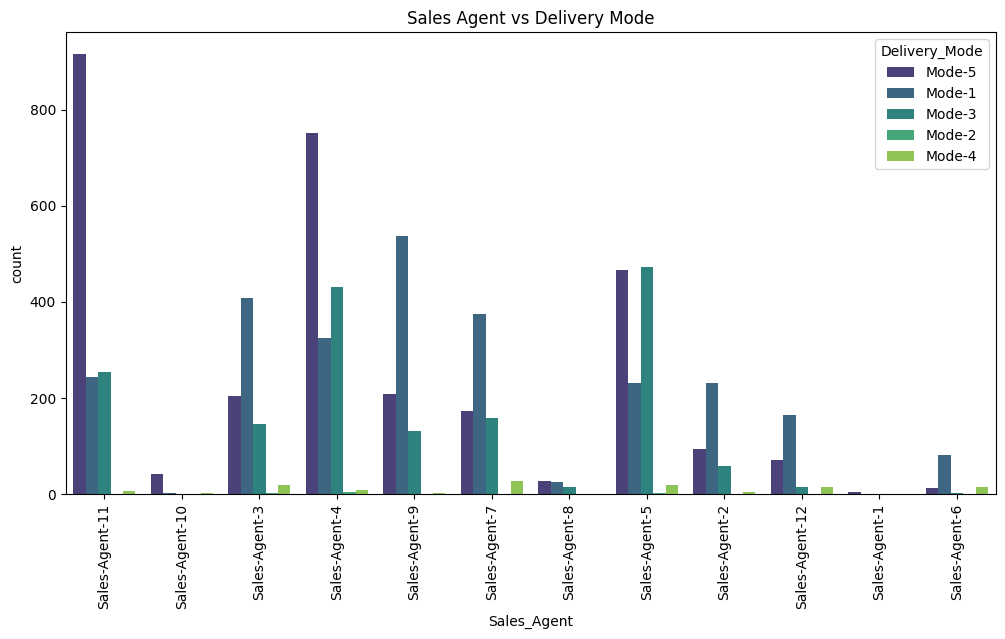

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='Sales_Agent', hue='Delivery_Mode', palette='viridis')
plt.title('Sales Agent vs Delivery Mode')
plt.xticks(rotation = 90)
plt.show()

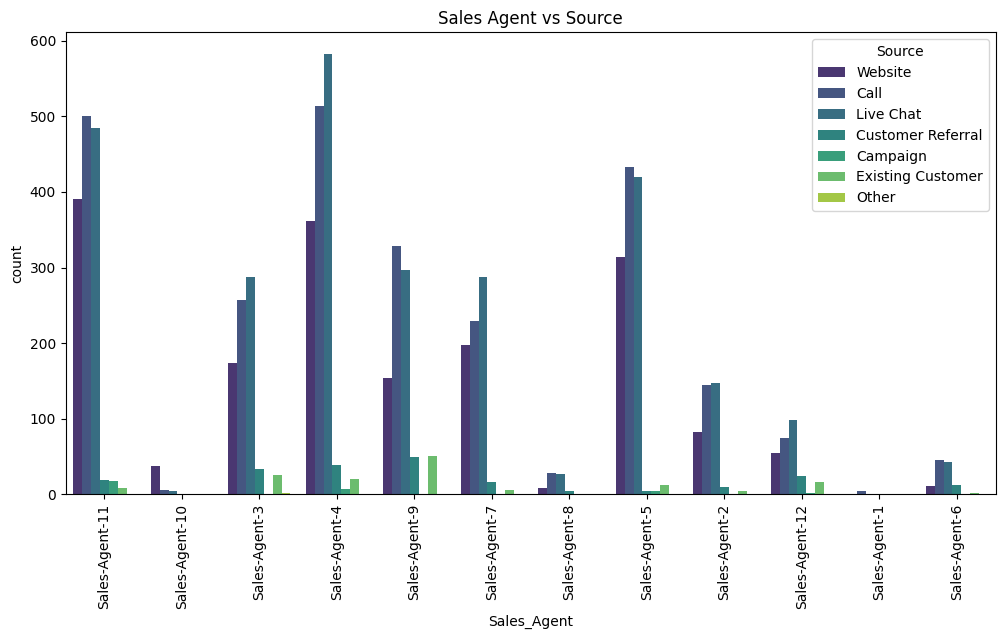

In [18]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='Sales_Agent', hue='Source', palette='viridis')
plt.title('Sales Agent vs Source')
plt.xticks(rotation = 90)
plt.show()

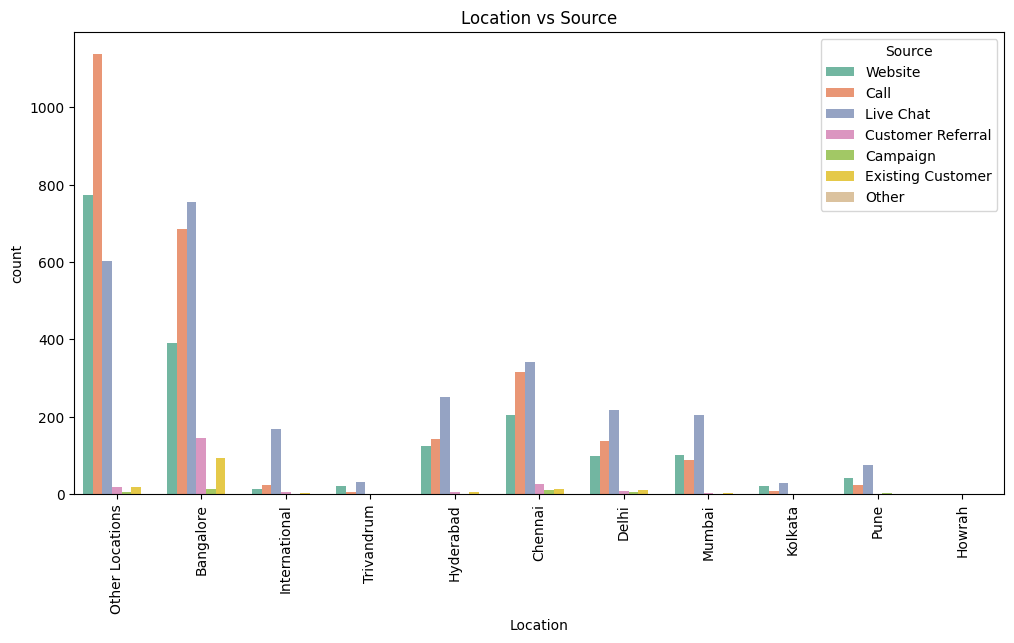

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x='Location', hue='Source', palette='Set2')
plt.title('Location vs Source')
plt.xticks(rotation=90)
plt.show()

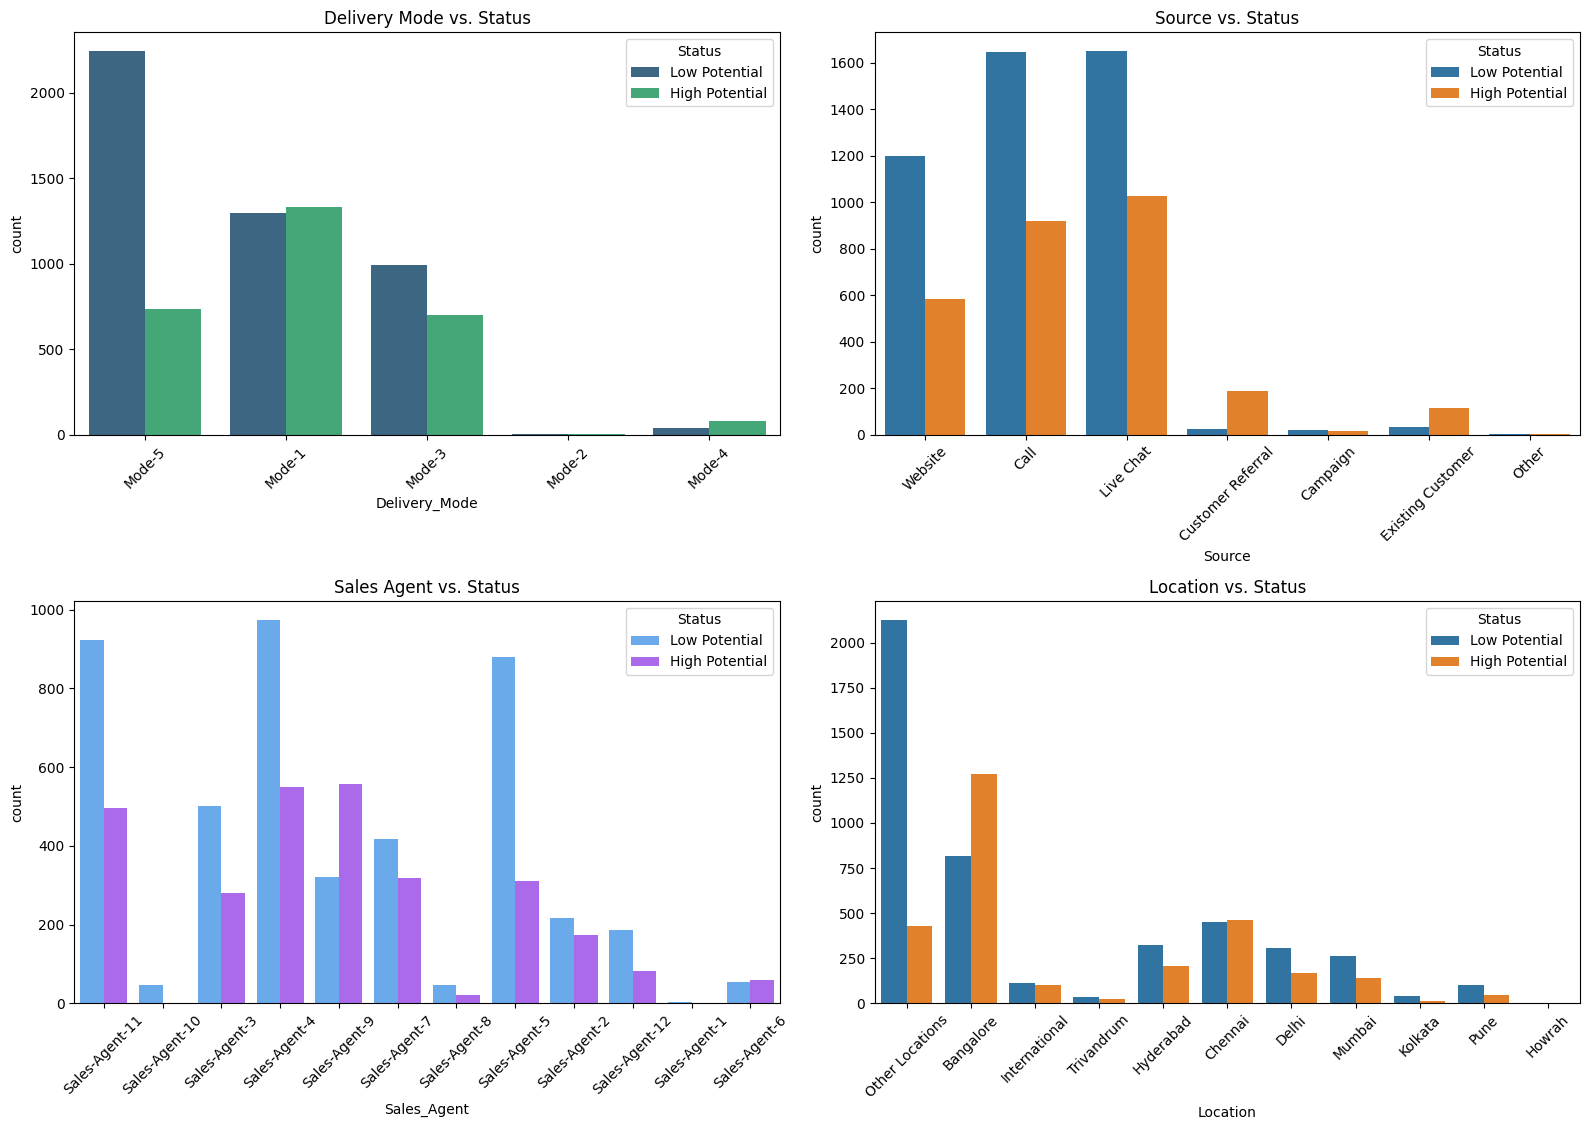

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12)) 

sns.countplot(data=data, x='Delivery_Mode', hue='Status', palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Delivery Mode vs. Status')
axes[0, 0].tick_params(axis='x', rotation=45)

sns.countplot(data=data, x='Source', hue='Status', palette='tab10', ax=axes[0, 1])
axes[0, 1].set_title('Source vs. Status')
axes[0, 1].tick_params(axis='x', rotation=45)

sns.countplot(data=data, x='Sales_Agent', hue='Status', palette='cool', ax=axes[1, 0])
axes[1, 0].set_title('Sales Agent vs. Status')
axes[1, 0].tick_params(axis='x', rotation=45)

sns.countplot(data=data, x='Location', hue='Status', palette='tab10', ax=axes[1, 1])
axes[1, 1].set_title('Location vs. Status')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

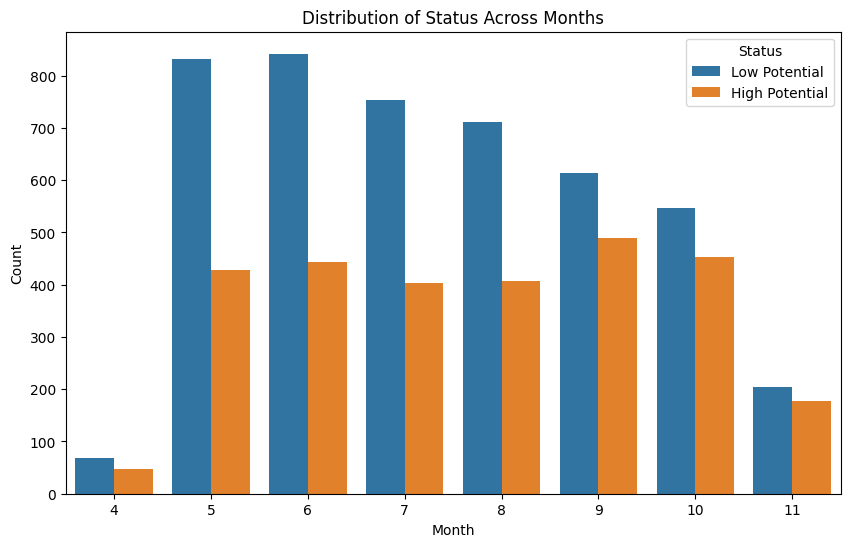

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Month', hue='Status')
plt.title('Distribution of Status Across Months')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Status', loc='upper right')
plt.show()

In [22]:
# correlation 

In [23]:
from scipy.stats import chi2_contingency
import pandas as pd

def chi_square_test(data, categorical_columns, target_column):
    chi2_results = []
    for col in categorical_columns:
        if col != target_column:
            contingency_table = pd.crosstab(data[col], data[target_column])
            chi2, p, _, _ = chi2_contingency(contingency_table)
            chi2_results.append((col, chi2, p))

    return pd.DataFrame(chi2_results, columns=['Feature', 'Chi-Square', 'P-Value'])

categorical_columns = data.select_dtypes(include=['object']).columns

chi2_df = chi_square_test(data, categorical_columns, target_column="Status")

highly_correlated_features = chi2_df[chi2_df["P-Value"] < 0.05]

print("Categorical Features Strongly Correlated with Target:")
print(highly_correlated_features)


Categorical Features Strongly Correlated with Target:
         Feature   Chi-Square        P-Value
0         Source   360.308761   9.441208e-75
1    Sales_Agent   386.018346   5.670432e-76
2       Location  1027.234966  2.538037e-214
3  Delivery_Mode   453.652294   7.051143e-97


In [24]:
# Source, Sales_Agent, Location, and Delivery_Mode are strongly correlated with the target variable, as their p-values are extremely low (< 0.05).

In [25]:
from scipy.stats import f_oneway

numerical_features = ['Product_ID', 'Month', 'Day','Hour','Minute']  # Replace with actual column names
target_column = 'Status'  # Replace with actual target column name

anova_results = {}

for feature in numerical_features:
    groups = [data[feature][data[target_column] == category] for category in data[target_column].unique()]
    f_stat, p_value = f_oneway(*groups)
    anova_results[feature] = {'F-Statistic': f_stat, 'P-Value': p_value}

anova_df = pd.DataFrame(anova_results).T
print(anova_df.sort_values('P-Value'))


            F-Statistic       P-Value
Month         57.236682  4.329067e-14
Product_ID    52.850542  3.966644e-13
Hour          20.763014  5.280890e-06
Minute         1.710144  1.910072e-01
Day            1.292935  2.555445e-01


In [26]:
# Month and  Product_ID have very strong correlations with the target (p-values < 0.05).

In [27]:
# so in feature enginnering will drop least correlated columns 